In [1]:
import Pkg; Pkg.status()

Status `~/.julia/environments/v1.10/Project.toml`
  [861a8166] Combinatorics v1.0.2
  [7073ff75] IJulia v1.24.2
  [2b0e0bc5] LanguageServer v4.5.1
  [91a5bcdd] Plots v1.40.4
  [b0d11df0] Quantikz v1.3.1
  [0525e862] QuantumClifford v0.9.4 `../../../Documents/Repos/QuantumClifford.jl`
  [295af30f] Revise v3.5.14
  [37e2e46d] LinearAlgebra


In [2]:
using QuantumClifford, QuantumClifford.ECC

Precompiling QuantumClifford
  ✓ QuantumClifford
  1 dependency successfully precompiled in 16 seconds. 39 already precompiled.


In [3]:
using Quantikz

Precompiling QuantumCliffordQuantikzExt
  ✓ QuantumClifford → QuantumCliffordQuantikzExt
  1 dependency successfully precompiled in 2 seconds. 110 already precompiled.


In [4]:
# methods(RandomCircuitCode)

# All-to-all connection

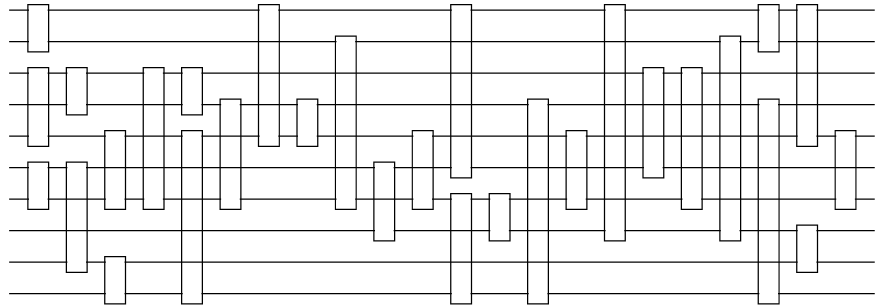

In [5]:
c1 = RandomCircuitCode(10, Val(:alltoall), 30, 4)
c1.circ

In [6]:
c1 |> parity_checks

+ YYYYZYXZYY
+ YY__Y_Y___
- ZZ_Y______
+ YX__X_YZX_
+ YXY_Y_ZZX_
+ YY__Y_YZ__

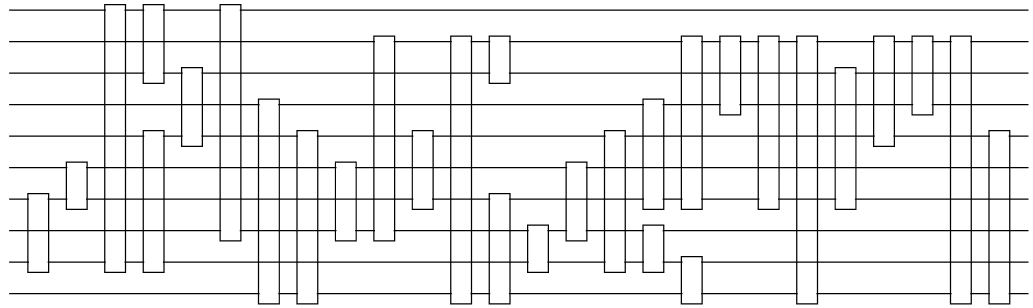

In [7]:
c2 = RandomCircuitCode(10, Val(:alltoall), 30, 1:2:7)
c2.circ

In [8]:
c2 |> parity_checks

- _YX_X__ZYY
- _ZZYX_X_YY
+ _Z__Z_XX_X
- Y_________
+ _X_XYZ_YZY
+ _Z_Z__X_Z_

# Brickwork connection

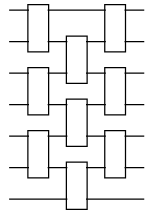

In [9]:
c3 = RandomCircuitCode((7,), Val(:brickwork), 3, [1,3,7])
c3.circ

In [10]:
c3 |> parity_checks

- _YXZ___
- ZYXZ___
- ____X__
- _____X_

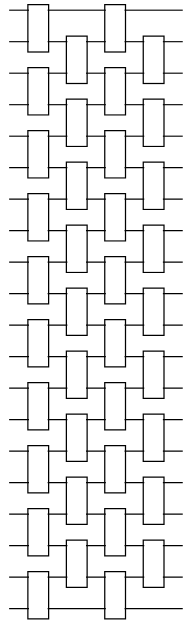

In [11]:
c4 = RandomCircuitCode((20,), Val(:brickwork), 4, 1:2:20)
c4.circ

In [12]:
c4 |> parity_checks

+ XZZYX_______________
+ _XZXX_Z_____________
+ _XZ_Z_Y_____________
+ ___ZZY_Z____________
+ _____Z_YXZX_________
+ ________XZ_XZ_______
+ ___________YXZZ_____
- ___________ZXZYYZ___
- _________________XZZ
- ________________ZX_Z

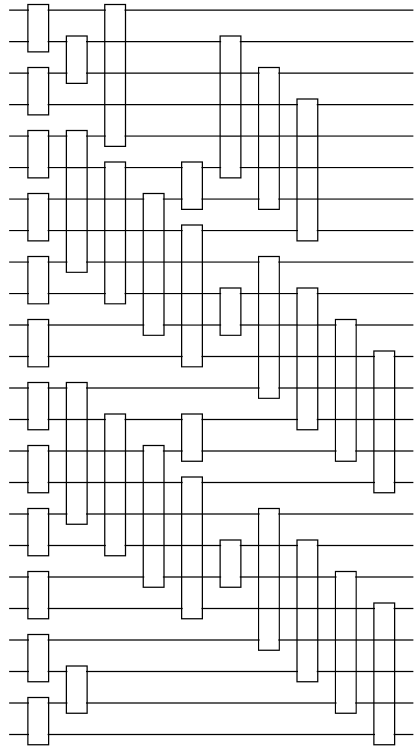

In [13]:
c5 = RandomCircuitCode((4,6), Val(:brickwork), 4, 1:10)
c5.circ

In [14]:
c5 |> parity_checks

+ ___Z_______X___Z________
+ _Y____X_________________
- ____________X___Z___X___
- __________Y___Z_________
- ___________Z___Y________
- _________X_______XZ__ZY_
+ _________________X___Z__
- ____________X____X___Z__
+ _________Z_Z_Z_Y___Y__XZ
+ _________Y___Z_____Z__XZ
+ ________________XZX_YYX_
- ________________YZY_YYX_
+ _________________Z___Y__
+ _________________Z_X_Y_Y

# Debug

The code here produce a bounds error when generating naive encoding circuits, to check why.

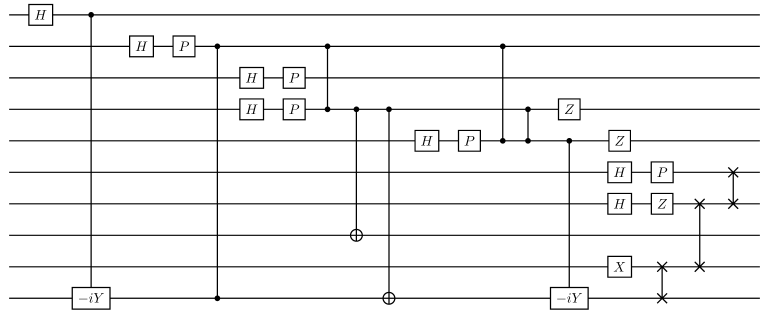

In [15]:
RandomCircuitCode(10, Val(:alltoall), 30, 1) |> naive_encoding_circuit